In [92]:
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway, ttest_ind
import pandas as pd
import seaborn as sns 

## Get Data

In [79]:
path = '/media/Seizures/Wenzel/mouse_tetrode/'
ks = [os.path.basename(x) for x in os.listdir(path) if os.path.isdir((os.path.join(path,x)))]

pathfiles = {k:[] for k in ks}

for (dirpath, dirnames, filenames) in os.walk(path):
    #print(dirpath)
    #mice = os.path.basename()
    for filename in filenames:
        if filename.endswith('.mat'):
            mouse = os.path.basename(dirpath)
            pathfiles[mouse].append(os.path.join(dirpath, filename))

In [80]:
df = pd.DataFrame(columns=['mouse', 'datapath', 'session', 'sd_index', 'bl_mean',
                          'preSD_mean', 'posSD_mean', 'preSD_zscored_mean', 
                           'posSD_zscored_mean'], index=np.linspace(0, 49))
bl_start_sec = 30
bl_period_sec = 30
sec_before = 30
sec_after = 30
buffer_sec = 3
counter = 0
for mouse, fnames in pathfiles.items():
    for index, f in enumerate(fnames):
        matfile = loadmat(f, squeeze_me=True)
        sd_index = matfile['binSD']
        sd_fr = matfile['binSpikeRateMtx']
        units = [sd_fr] if type(sd_fr[0])==np.uint8 else sd_fr
        #print(len(units[0]))
        for ix, unit in enumerate(units):
            baseline = unit[bl_start_sec:bl_start_sec+bl_period_sec]
            preSD = unit[sd_index-sec_before:sd_index]
            posSD = unit[sd_index+buffer_sec:sd_index+buffer_sec+sec_after]
            
            bl_mean = np.nanmean(baseline)
            bl_std = np.nanstd(baseline)
            preSD_zscored = np.divide(np.subtract(preSD, bl_mean), bl_std)
            posSD_zscored = np.divide(np.subtract(posSD, bl_mean), bl_std)
            preSD_mean = np.nanmean(preSD)
            posSD_mean = np.nanmean(posSD)
            
            preSD_zscored_mean = np.nanmean(preSD_zscored)
            posSD_zscored_mean = np.nanmean(posSD_zscored)
            
            
            df['mouse'][counter] = mouse
            df['session'][counter] = os.path.basename(f)
            df['datapath'][counter] = f.strip('.mat')
            df['sd_index'][counter] = sd_index
            df['bl_mean'][counter] = float(bl_mean)
            df['preSD_mean'][counter] = float(preSD_mean)
            df['posSD_mean'][counter] = float(posSD_mean)
            df['preSD_zscored_mean'][counter] = float(preSD_zscored_mean)
            df['posSD_zscored_mean'][counter] = float(posSD_zscored_mean)
            counter += 1
            
            print(mouse, counter)

df['preSD_mean'] = pd.to_numeric(df['preSD_mean'], errors='coerce')
df['posSD_mean'] = pd.to_numeric(df['posSD_mean'], errors='coerce')

df['preSD_zscored_mean'] = pd.to_numeric(df['preSD_zscored_mean'], errors='coerce')
df['posSD_zscored_mean'] = pd.to_numeric(df['posSD_zscored_mean'], errors='coerce')

df['preSD_zscored_mean'].replace([np.inf, -np.inf], np.nan, inplace=True)

mouse_06 1
mouse_06 2
mouse_06 3
mouse_06 4
mouse_06 5
mouse_06 6
mouse_06 7
mouse_06 8
mouse_06 9
mouse_06 10
mouse_06 11
mouse_06 12
mouse_06 13
mouse_06 14
mouse_06 15
mouse_04 16
mouse_04 17
mouse_04 18
mouse_04 19
mouse_04 20
mouse_04 21
mouse_04 22
mouse_04 23
mouse_04 24
mouse_04 25
mouse_04 26


/tmp/ipykernel_1257340/1023326422.py:24: RuntimeWarning: divide by zero encountered in true_divide
  preSD_zscored = np.divide(np.subtract(preSD, bl_mean), bl_std)
/tmp/ipykernel_1257340/1023326422.py:24: RuntimeWarning: invalid value encountered in true_divide
  preSD_zscored = np.divide(np.subtract(preSD, bl_mean), bl_std)
/tmp/ipykernel_1257340/1023326422.py:25: RuntimeWarning: invalid value encountered in true_divide
  posSD_zscored = np.divide(np.subtract(posSD, bl_mean), bl_std)
/tmp/ipykernel_1257340/1023326422.py:30: RuntimeWarning: Mean of empty slice
  posSD_zscored_mean = np.nanmean(posSD_zscored)


mouse_04 27
mouse_04 28
mouse_04 29
mouse_04 30
mouse_04 31
mouse_04 32
mouse_04 33
mouse_04 34
mouse_04 35
mouse_04 36
mouse_04 37
mouse_04 38
mouse_04 39
mouse_04 40
mouse_04 41
mouse_04 42
mouse_02 43
mouse_02 44
mouse_02 45
mouse_02 46
mouse_02 47
mouse_02 48
mouse_02 49
mouse_02 50


### Statistical test

In [89]:
_, pval_mean = ttest_ind(df['preSD_mean'], df['posSD_mean'])
_, pval_zscored = ttest_ind(df.dropna()['preSD_zscored_mean'], 
                            df.dropna()['posSD_zscored_mean'])

### Plotting the results

### Mean pre/pos comparison

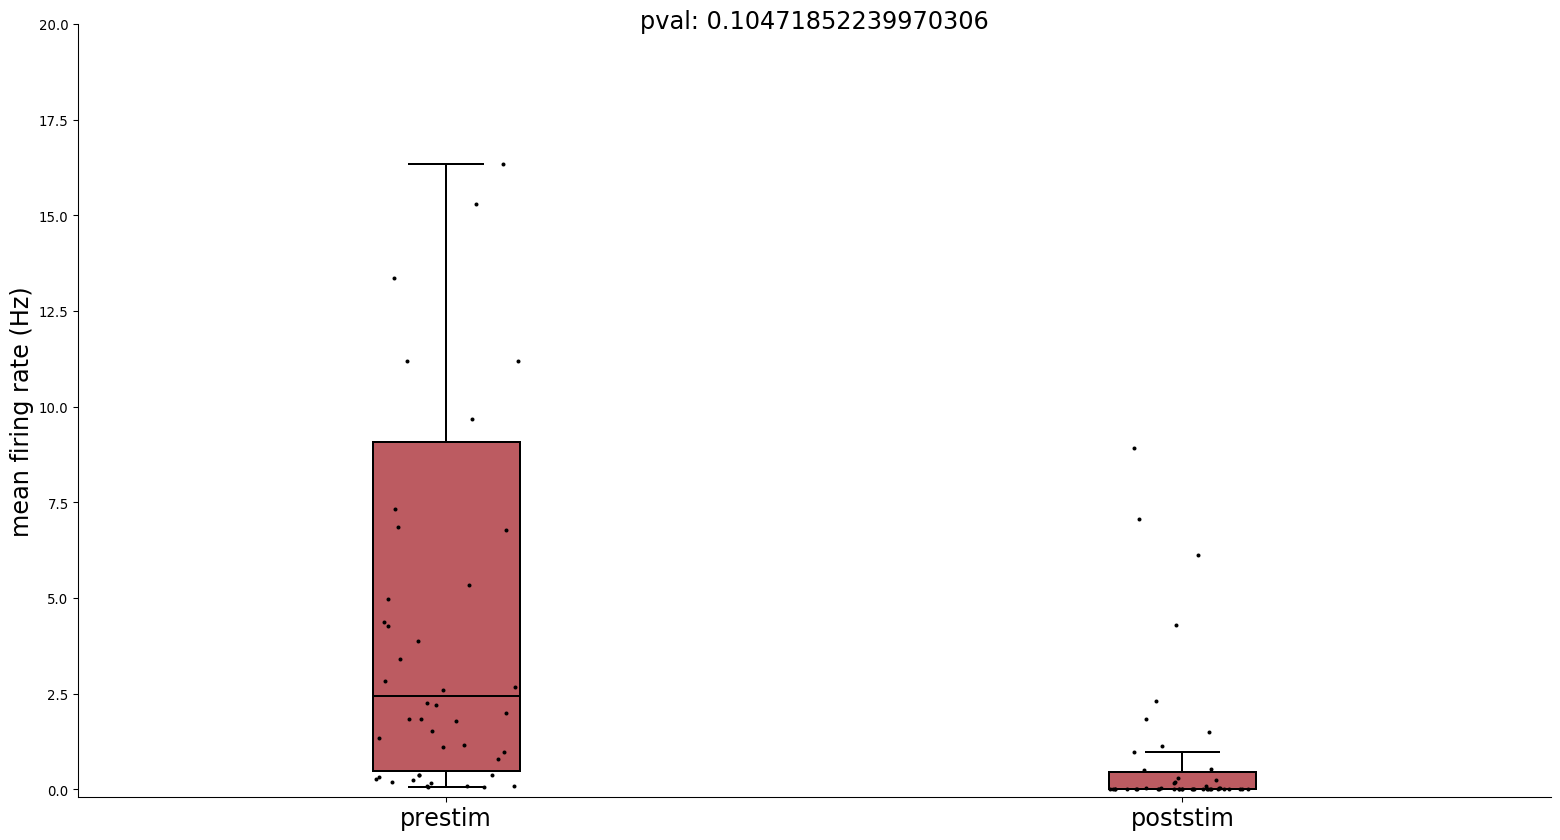

In [125]:
savepath = '/media/Seizures/Wenzel/mouse_tetrode/'

subset = df[['preSD_mean', 
             'posSD_mean' ]]

my_dpi = 96
fig, ax = plt.subplots(figsize=(1900/my_dpi, 1024/my_dpi), dpi=my_dpi)

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}
col = sns.light_palette((10, 60, 50), input="husl")

# Create a box plot with matched width of strip plot
sns.boxplot(x='variable', y='value', data=pd.melt(subset), ax=ax, 
            showfliers=False, width=0.2, color=col[5], **PROPS)
# Overlay a strip plot with explicit x-axis positions
sns.stripplot(x='variable', y='value', data=pd.melt(subset), 
              color='black', jitter=True, size=3, ax=ax)

ax.set_ylim(subset['posSD_mean'].min()-0.2,min(subset['preSD_mean'].max()+0.2,20))
ax.set_ylabel('mean firing rate (Hz)', fontsize=18)
ax.set_xlabel('', fontsize=18)
ax.set_xticklabels(['prestim', 'poststim'], fontsize=18)
ax.set_title('')

# Remove grid and spines
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.suptitle('')

# Place p-value text in the middle
text_x = 0.5
text_y = ax.get_ylim()[1] - 0.1  # Adjust this value based on your preference
plt.text(text_x, text_y, f'pval: {pval_mean}', fontsize=18, ha='center')

# Save or display the plot
plt.savefig(os.path.join(savepath, 'stats_mean_preposSD.eps'), format='eps')
plt.show()

### Z-scored pre/pos comparison

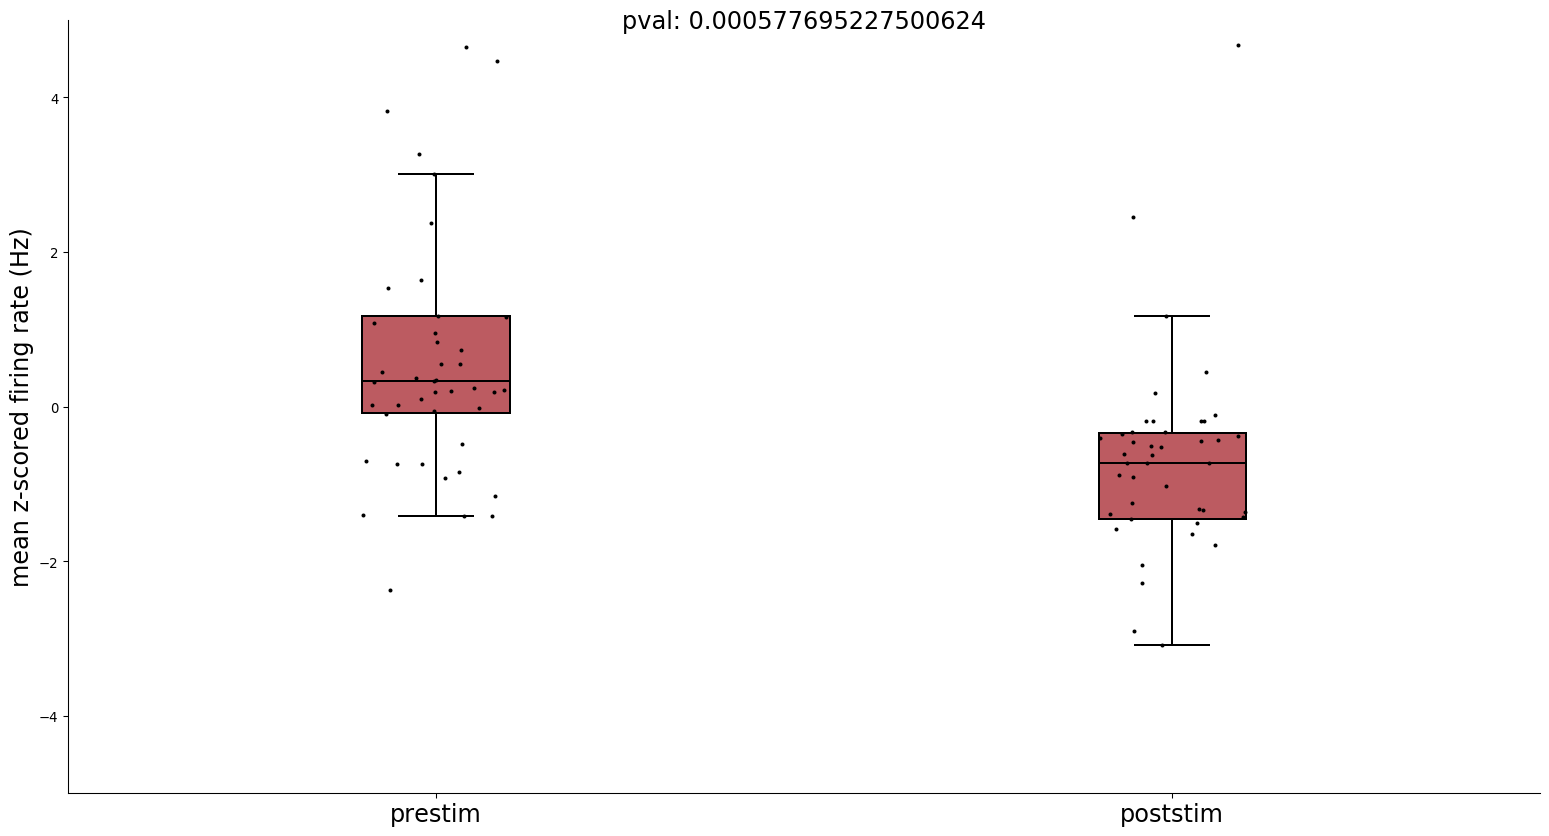

In [124]:
savepath = '/media/Seizures/Wenzel/mouse_tetrode/'

subset = df[['preSD_zscored_mean', 
             'posSD_zscored_mean' ]]

my_dpi = 96
fig, ax = plt.subplots(figsize=(1900/my_dpi, 1024/my_dpi), dpi=my_dpi)

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}
col = sns.light_palette((10, 60, 50), input="husl")

# Create a box plot with matched width of strip plot
sns.boxplot(x='variable', y='value', data=pd.melt(subset), ax=ax, 
            showfliers=False, width=0.2, color=col[5], **PROPS)
# Overlay a strip plot with explicit x-axis positions
sns.stripplot(x='variable', y='value', data=pd.melt(subset), 
              color='black', jitter=True, size=3, ax=ax)

ax.set_ylim(max(subset['posSD_zscored_mean'].min()-0.2,-5),
            min(subset['preSD_zscored_mean'].max()+0.2,5))
#ax.set_ylim(subset['posSD_mean'].min()-0.2,1.6)
ax.set_ylabel('mean z-scored firing rate (Hz)', fontsize=18)
ax.set_xlabel('', fontsize=18)
ax.set_xticklabels(['prestim', 'poststim'], fontsize=18)
ax.set_title('')

# Remove grid and spines
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.suptitle('')

# Place p-value text in the middle
text_x = 0.5
text_y = ax.get_ylim()[1] - 0.1  # Adjust this value based on your preference
plt.text(text_x, text_y, f'pval: {pval_zscored}', fontsize=18, ha='center')

# Save or display the plot
plt.savefig(os.path.join(savepath, 'stats_zscored_preposSD.eps'), format='eps')
plt.show()